In [ ]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

data_path = '/content/drive/MyDrive/pandas/module/'

# Load datasets
events = pd.read_csv(data_path + 'events.csv')
products = pd.read_csv(data_path + 'products.csv')
countries = pd.read_csv(data_path + 'countries.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Data overview
##The tables include:

1. events.csv: sales events over several years;

2. products.csv: product type and id;

3. countries.csv: country and region codes.

Key Columns are Product ID & id, and Country Code & alpha-3

## Each dataset is examined using .head(), .shape, .info(), and .value_counts() methods to:

* preview the first few records;

* understand the structure and size of the data;

* check data types and null values;

* explore the distribution of values in key columns.

## This step helps detect potential issues such as:

* missing or incorrect data,

* inconsistent column types,

* unexpected value distributions or duplicates.





**Events**

In [ ]:
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
events.shape

(1330, 10)

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
events["Product ID"].value_counts()


,count
Product ID,
8681,123
1270,121
3127,115
8293,114
5988,114
7331,112
4594,112
8875,111
2455,105


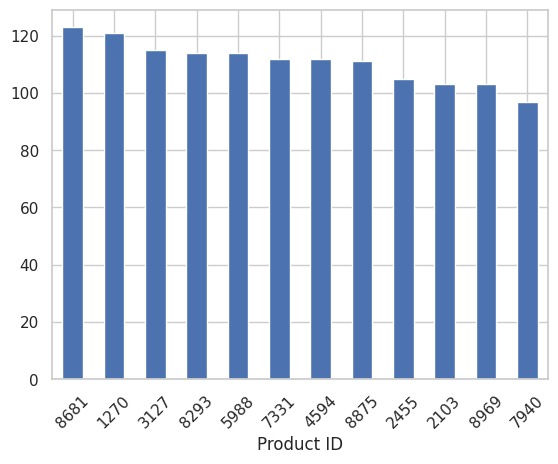

In [ ]:
events["Product ID"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

**Products**

In [ ]:
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
products.shape

(12, 2)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


**Countries**

In [ ]:
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
countries.shape

(249, 5)

In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
countries["region"].value_counts()

,count
region,
Africa,60
Americas,57
Asia,51
Europe,51
Oceania,29


## Step 2: Data Cleaning
* Removed two rows with missing Units Sold (0.15% of valid entries or 2 of 1330).

* Replaced missing Country Code values with "Unknown" to keep them visible in visualizations.

* Filled missing region and sub-region for Antarctica with "Antarctica" since it's a single-row case.

* Noted that the alpha-2 code for Namibia appears as NaN due to encoding/display issue — no change applied.

* Converted Order Date and Ship Date to datetime64 format.

* No duplicates or anomalies were found.









**Events**

In [ ]:
events.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [ ]:
print(events.isna().sum() / events.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
events[events.isnull().any(axis=1)]


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
13,104548490,1/1/2014,1/5/2014,M,NaN,7331,Online,7076.0,255.28,159.42
26,117929494,1/24/2015,3/2/2015,H,NaN,4594,Offline,6813.0,9.33,6.92
29,118859469,6/2/2011,7/1/2011,L,NaN,8969,Offline,2013.0,152.58,97.44
43,126948583,5/24/2017,7/9/2017,C,NaN,7331,Online,5762.0,255.28,159.42
...,...,...,...,...,...,...,...,...,...,...
1213,919922006,8/27/2011,9/18/2011,L,NaN,4594,Online,4219.0,9.33,6.92
1220,922564303,3/17/2017,4/2/2017,L,NaN,7940,Offline,6134.0,668.27,502.54
1250,941061675,3/8/2017,3/20/2017,M,NaN,5988,Offline,9917.0,154.06,90.93
1296,975080668,7/23/2017,8/20/2017,C,NaN,5988,Offline,6893.0,154.06,90.93


**Products**

In [ ]:
products.isna().sum()

,0
id,0
item_type,0


**Countries**

In [ ]:
countries.isna().sum()

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


In [ ]:
print(countries.isna().sum() / countries.shape[0] * 100)


name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
countries[countries.isnull().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"]) # Convert  Order date columns to datetime
events["Ship Date"] = pd.to_datetime(events["Ship Date"]) # Convert Ship Date columnsto datetime
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


In [ ]:

print(f'Dublicated rows in events : {events.duplicated().sum()}')
print(f'Dublicated rows in products : {products.duplicated().sum()}')
print(f'Dublicated rows in countries : {countries.duplicated().sum()}')

Dublicated rows in events : 0
Dublicated rows in products : 0
Dublicated rows in countries : 0


In [ ]:
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.201807,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2905.198996,217.323460,176.158873


In [ ]:
# Only two rows with missing 'Units Sold' — dropped due to minimal impact.
events = events.dropna(subset=['Units Sold'])
# 82 missing 'Country Code' values replaced with 'Unknown' for clarity.
events.loc[:, 'Country Code'] = events['Country Code'].fillna('Unknown')



In [ ]:
countries.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
# 'alpha-2' has one 'NaN' for Namibia, which remains unchanged for now
# Replacing NaN in 'region' and 'sub-region' for Antarctica to specify correct information
countries.loc[countries['name'] == 'Antarctica', ['region', 'sub-region']] = 'Antarctica'

In [ ]:
products.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


## Step 3: Data Analysis and Visualization

###1. Merging the data sets, renaming columns, and removing unnecessary columns for analysis.










In [ ]:
#columns renaming to join data
products = products.rename(columns={"id": "Product ID"})
countries = countries.rename (columns={"alpha-3": "Country Code"})

# Merge events and products on 'Product ID' using an a left join
merged1 = pd.merge(events, products, on='Product ID', how='left')
# Join countries to the new dataframe on 'Country Code' using an a left join
sales = pd.merge(merged1, countries, on='Country Code', how='left')
sales.head()



,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [ ]:
# Dropping columns that are not relevant for analysis
sales = sales.drop(columns=['Order ID', 'Country Code', 'Product ID', 'alpha-2'])
sales.head()

,Order Date,Ship Date,Order Priority,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,region,sub-region
0,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [ ]:
#columns renaming
sales = sales.rename(columns={"item_type": "category", "name": "country", "Order Priority": "priority"})
sales.head()

,Order Date,Ship Date,priority,Sales Channel,Units Sold,Unit Price,Unit Cost,category,country,region,sub-region
0,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [ ]:
# Add a new column showing shipping delay in days and profit
sales["shipping delay days"] = (sales["Ship Date"] - sales["Order Date"]).dt.days
sales['profit'] = (sales['Unit Price'] - sales['Unit Cost']) * sales['Units Sold']
sales.head()

,Order Date,Ship Date,priority,Sales Channel,Units Sold,Unit Price,Unit Cost,category,country,region,sub-region,shipping delay days,profit
0,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe,10,57583.50
1,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe,0,176559.87
2,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,24,777770.89
3,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe,31,85998.24
4,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe,38,119767.68


In [ ]:
# Convert column names to lowercase & snake_case
sales.columns = sales.columns.str.lower().str.replace(' ', '_')
sales.head()

,order_date,ship_date,priority,sales_channel,units_sold,unit_price,unit_cost,category,country,region,sub-region,shipping_delay_days,profit
0,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe,10,57583.50
1,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe,0,176559.87
2,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,24,777770.89
3,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe,31,85998.24
4,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe,38,119767.68


In [ ]:
# Clean 'Sales Channel' values by converting to lowercase and standardizing the format to resolve inconsistencies like 'Online' and 'online'.
sales['sales_channel'] = sales['sales_channel'].str.lower()
sales['sales_channel'].unique()

array(['online', 'offline'], dtype=object)

###2.Key Metrics

In [ ]:
# Calculate key metrics
total_orders = sales.shape[0]
total_profit = sales['profit'].sum()
total_units_sold = sales['units_sold'].sum()
total_countries = sales['country'].nunique()
total_categories = sales['category'].nunique()
avg_profit_per_order = sales['profit'].mean()
avg_shipping_delay = sales['shipping_delay_days'].mean()

# Display results
print(f"Total orders: {total_orders}")
print(f"Total profit: ${total_profit:,.2f}")
print(f"Total units sold: {total_units_sold}")
print(f"Countries covered: {total_countries}")
print(f"Product categories: {total_categories}")
print(f"Average profit per order: ${avg_profit_per_order:,.2f}")
print(f"Average shipping delay (days): {avg_shipping_delay:.2f}")


Total orders: 1328
Total profit: $501,434,459.00
Total units sold: 6576524.0
Countries covered: 45
Product categories: 12
Average profit per order: $377,586.19
Average shipping delay (days): 24.79


###3. Sales Analysis
#### **By Product Category**


In [ ]:
# Group by category and calculate key metrics
category_summary = sales.groupby('category').agg({
    'units_sold': 'sum',
    'unit_price': lambda x: (x * sales.loc[x.index, 'units_sold']).sum(),
    'unit_cost': lambda x: (x * sales.loc[x.index, 'units_sold']).sum(),
    'profit': 'sum'
}).rename(columns={
    'units_sold': 'Total Units Sold',
    'unit_price': 'Total Revenue',
    'unit_cost': 'Total Cost',
    'profit': 'Total Profit'
}).sort_values('Total Profit', ascending=False)
category_summary



,Total Units Sold,Total Revenue,Total Cost,Total Profit
category,,,,
Cosmetics,533291.0,2.331548e+08,1.404315e+08,92723306.17
Office Supplies,617641.0,4.022140e+08,3.242368e+08,77977176.25
Household,440249.0,2.942052e+08,2.212427e+08,72962466.77
Baby Food,562706.0,1.436476e+08,8.970659e+07,53940997.16
Clothes,591385.0,6.462655e+07,2.119524e+07,43431314.40
Cereal,465685.0,9.579140e+07,5.453637e+07,41255034.15
Vegetables,582544.0,8.974673e+07,5.297073e+07,36776002.72
Meat,530380.0,2.237620e+08,1.934243e+08,30337736.00
Snacks,490160.0,7.478861e+07,4.776119e+07,27027422.40


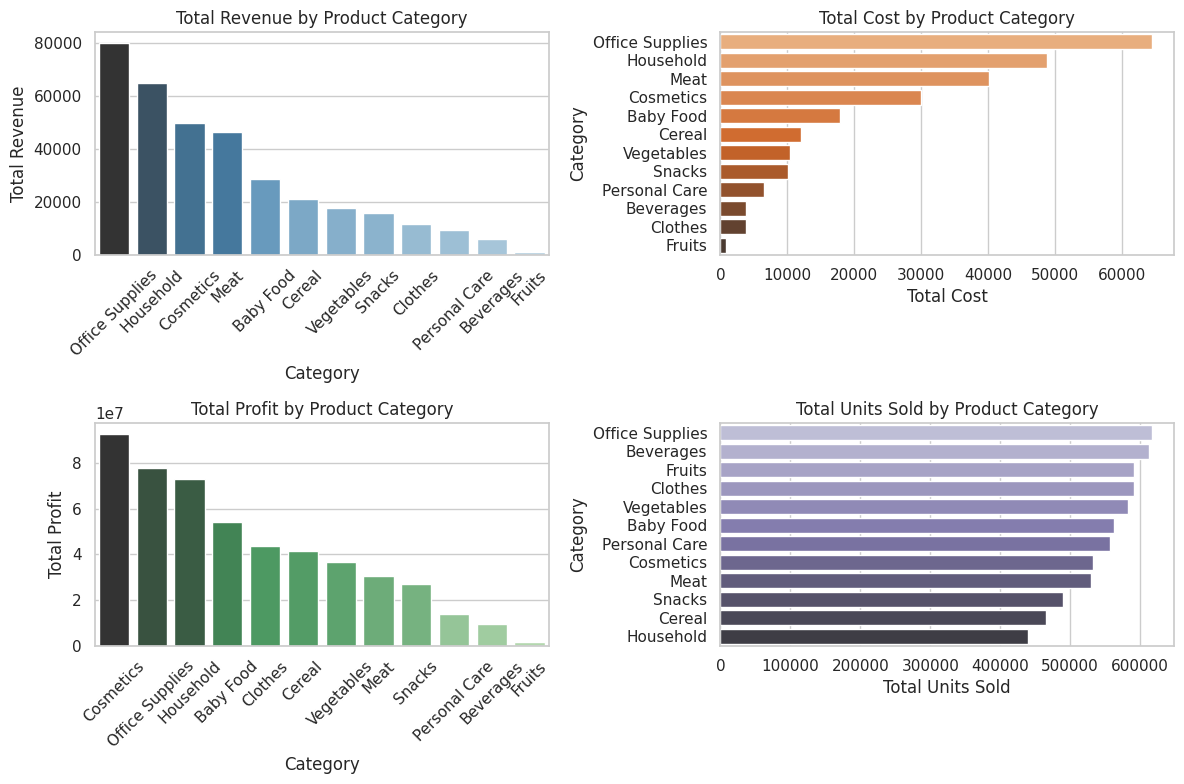

In [ ]:
# Group data by product category and calculate key indicators
category_summary = sales.groupby('category').agg(
    Total_Revenue=('unit_price', 'sum'),
    Total_Cost=('unit_cost', 'sum'),
    Total_Profit=('profit', 'sum'),
    Total_Units_Sold=('units_sold', 'sum')
).reset_index()

# Create a grid of 4 sub-graphs (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Graph 1: Total Revenue by Product Category
category_summary_sorted_revenue = category_summary.sort_values(by='Total_Revenue', ascending=False)
sns.barplot(data=category_summary_sorted_revenue, x='category', y='Total_Revenue',hue='Total_Revenue', palette='Blues_d', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Total Revenue by Product Category')
axs[0, 0].set_xlabel('Category')
axs[0, 0].set_ylabel('Total Revenue')
axs[0, 0].tick_params(axis='x', labelrotation=45)

# Graph 2: Total Cost by Product Category
category_summary_sorted_cost = category_summary.sort_values(by='Total_Cost', ascending=False)
sns.barplot(data=category_summary_sorted_cost, x='Total_Cost', y='category',hue='category', palette='Oranges_d', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Total Cost by Product Category')
axs[0, 1].set_xlabel('Total Cost')
axs[0, 1].set_ylabel('Category')

# Graph 3: Total Profit by Product Category
category_summary_sorted_profit = category_summary.sort_values(by='Total_Profit', ascending=False)
sns.barplot(data=category_summary_sorted_profit, x='category', y='Total_Profit', hue='Total_Profit', palette='Greens_d', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Total Profit by Product Category')
axs[1, 0].set_xlabel('Category')
axs[1, 0].set_ylabel('Total Profit')
axs[1, 0].tick_params(axis='x', labelrotation=45)

# Graph 4: Total Units Sold by Product Category
category_summary_sorted_units = category_summary.sort_values(by='Total_Units_Sold', ascending=False)
sns.barplot(data=category_summary_sorted_units, x='Total_Units_Sold', y='category', hue='category', palette='Purples_d', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Total Units Sold by Product Category')
axs[1, 1].set_xlabel('Total Units Sold')
axs[1, 1].set_ylabel('Category')


plt.tight_layout()
plt.show()




#### **Geography (countries, regions)**

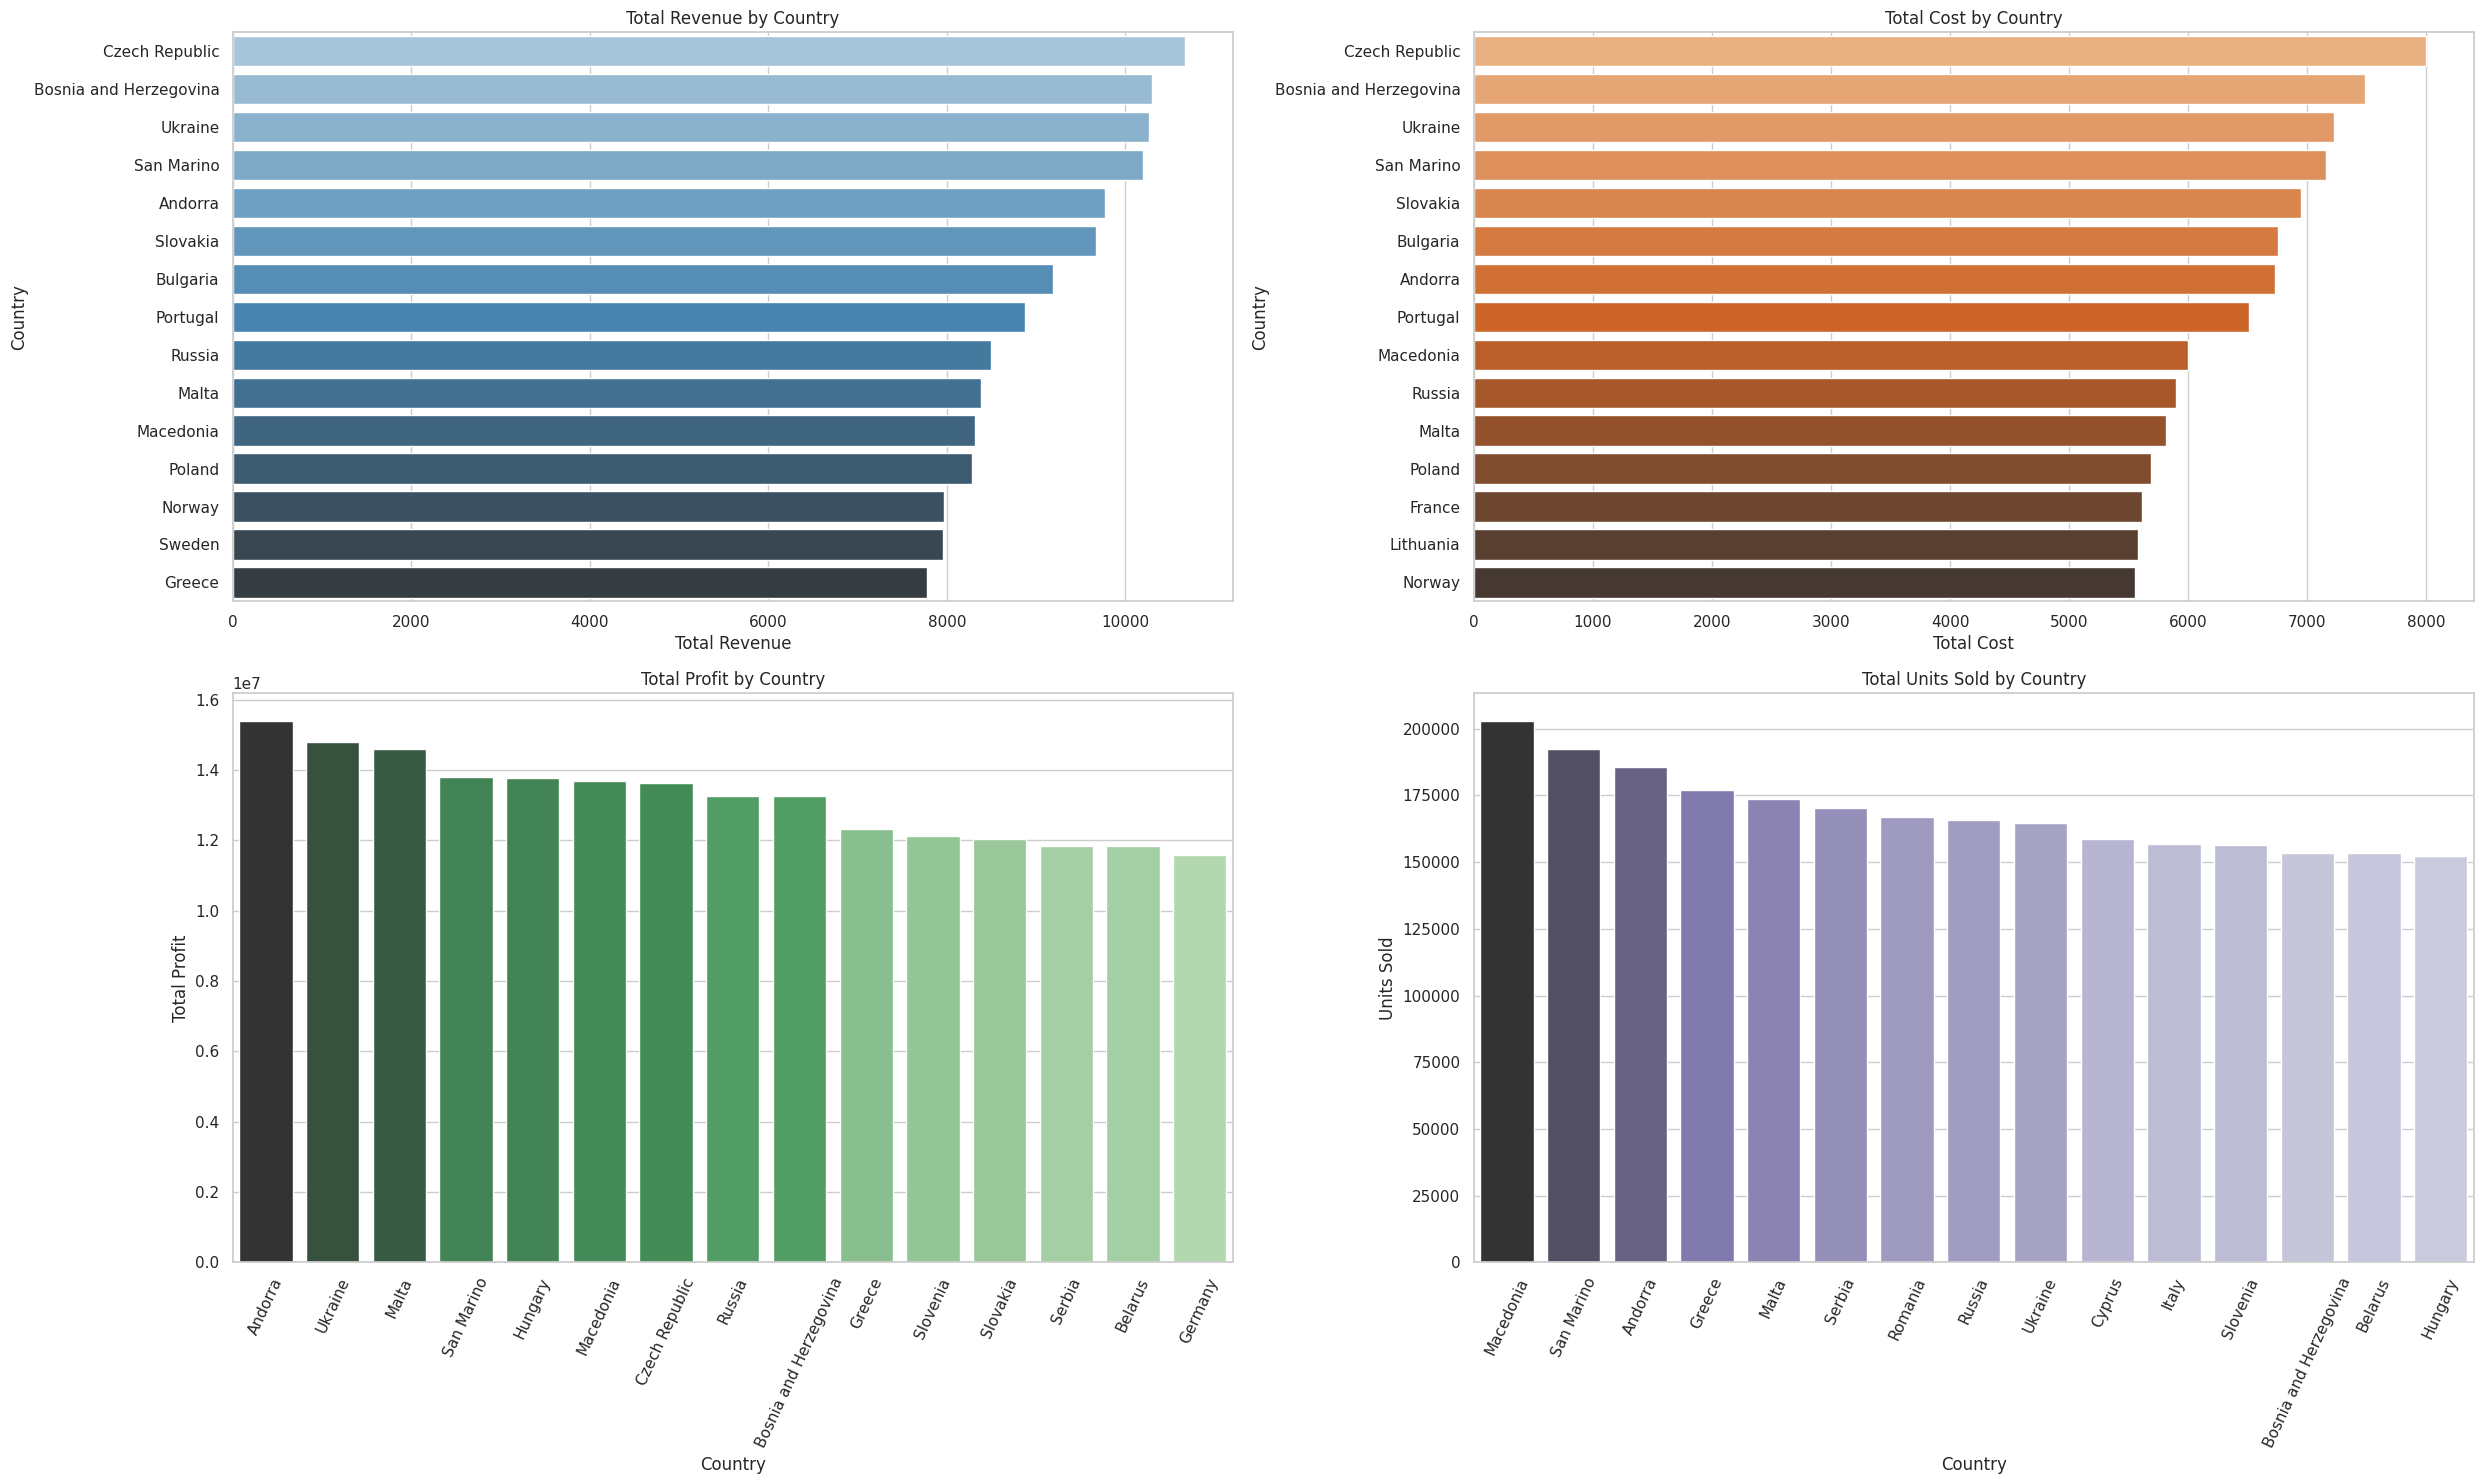

In [ ]:
# Grouping by countries
country_summary = sales.groupby('country').agg(
    Total_Revenue=('unit_price', 'sum'),
    Total_Cost=('unit_cost', 'sum'),
    Total_Profit=('profit', 'sum'),
    Total_Units_Sold=('units_sold', 'sum')
).reset_index()

# Sorting
sorted_revenue = country_summary.sort_values(by='Total_Revenue', ascending=False)
sorted_cost = country_summary.sort_values(by='Total_Cost', ascending=False)
sorted_profit = country_summary.sort_values(by='Total_Profit', ascending=False)
sorted_units = country_summary.sort_values(by='Total_Units_Sold', ascending=False)

# Plotting the graphs
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
sns.set(style="whitegrid")

# Graph 1: Horizontal bars — Revenue
sns.barplot(data=sorted_revenue.head(15), x='Total_Revenue', y='country',hue='country',
            palette='Blues_d', ax=axs[0, 0])
axs[0, 0].set_title('Total Revenue by Country')
axs[0, 0].set_xlabel('Total Revenue')
axs[0, 0].set_ylabel('Country')

# Graph 2: Vertical bars — Cost
sns.barplot(data=sorted_cost.head(15), x='Total_Cost', y='country', hue='country',
            palette='Oranges_d', ax=axs[0, 1])
axs[0, 1].set_title('Total Cost by Country')
axs[0, 1].set_xlabel('Total Cost')
axs[0, 1].set_ylabel('Country')


# Graph 3: Horizontal bars — Profit
sns.barplot(data=sorted_profit.head(15), x='country', y='Total_Profit', hue='Total_Profit',legend=False,
            palette='Greens_d', ax=axs[1, 0])
axs[1, 0].set_title('Total Profit by Country')
axs[1, 0].set_xlabel('Country')
axs[1, 0].set_ylabel('Total Profit')
axs[1, 0].tick_params(axis='x', rotation=65)

# Graph 4: Vertical bars — Units Sold
sns.barplot(data=sorted_units.head(15), x='country', y='Total_Units_Sold', hue='Total_Units_Sold',legend=False,
            palette='Purples_d', ax=axs[1, 1])
axs[1, 1].set_title('Total Units Sold by Country')
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Units Sold')
axs[1, 1].tick_params(axis='x', rotation=65)

plt.tight_layout()
plt.show()


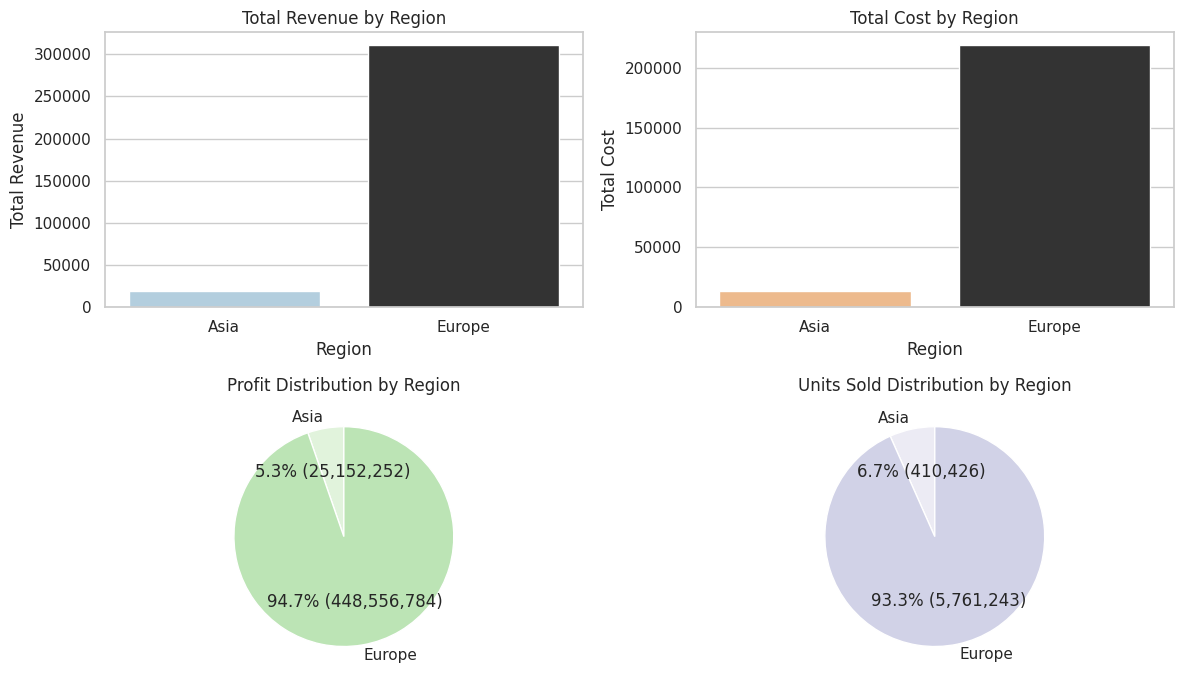

In [ ]:
# Grouping by regions
region_summary = sales.groupby('region').agg(
    Total_Revenue=('unit_price', 'sum'),
    Total_Cost=('unit_cost', 'sum'),
    Total_Profit=('profit', 'sum'),
    Total_Units_Sold=('units_sold', 'sum')
).reset_index()

# Plotting the graphs
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
sns.set(style="whitegrid")

# Graph 1: Bar — Revenue
sns.barplot(data=region_summary, x='region', y='Total_Revenue',hue='Total_Revenue', legend=False,
            palette='Blues_d', ax=axs[0, 0])
axs[0, 0].set_title('Total Revenue by Region')
axs[0, 0].set_xlabel('Region')
axs[0, 0].set_ylabel('Total Revenue')

# Graph 2: Bar — Cost
sns.barplot(data=region_summary, x='region', y='Total_Cost', hue='Total_Cost',legend=False,
            palette='Oranges_d', ax=axs[0, 1])
axs[0, 1].set_title('Total Cost by Region')
axs[0, 1].set_xlabel('Region')
axs[0, 1].set_ylabel('Total Cost')

# Graph 3: Pie chart — Profit
axs[1, 0].pie(
    region_summary['Total_Profit'],
    labels=region_summary['region'],
    autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*region_summary["Total_Profit"].sum()):,})',
    startangle=90,
    colors=sns.color_palette('Greens')
)
axs[1, 0].set_title('Profit Distribution by Region')

# Graph 4: Pie chart — Units Sold
axs[1, 1].pie(
    region_summary['Total_Units_Sold'],
    labels=region_summary['region'],
    autopct=lambda x: f'{x:.1f}% ({int(x/100.*region_summary["Total_Units_Sold"].sum()):,})',
    startangle=90,
    colors=sns.color_palette('Purples')
)
axs[1, 1].set_title('Units Sold Distribution by Region')

plt.tight_layout()
plt.show()



#### **Sales channels**

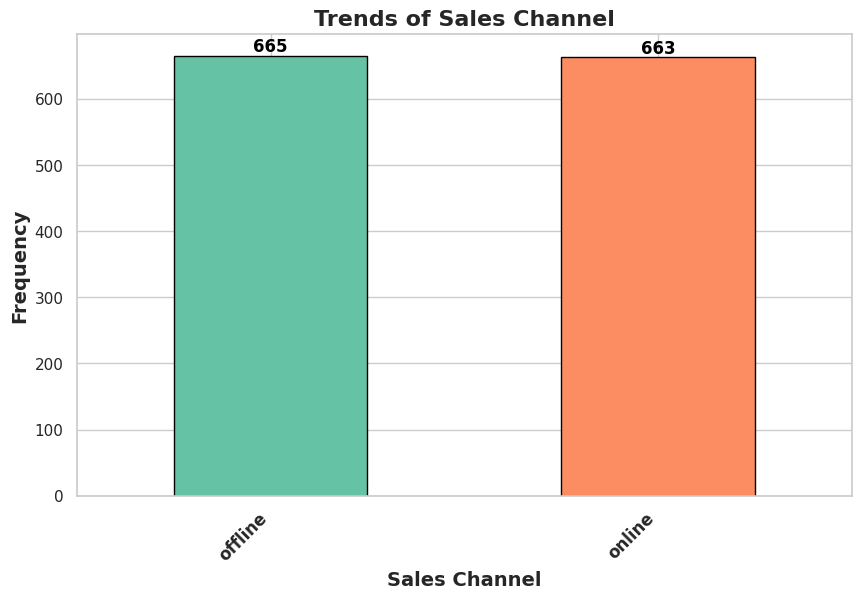

In [ ]:
# Graph: Bar chart by sales channels
bars = sales["sales_channel"].value_counts().plot(kind="bar",
                                                  color=sns.color_palette("Set2", len(sales["sales_channel"].unique())),
                                                  edgecolor="black", figsize=(10, 6))


plt.title("Trends of Sales Channel", fontsize=16, fontweight='bold')
plt.xlabel("Sales Channel", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')

# Adding data to each bar
for bar in bars.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2

    # Adding text
    plt.text(
        x, height + 0.2,
        f"{int(height)}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=12,
        fontweight="bold",
    )

plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.show()


**Conclusion**

**Online** and **offlien** sales channel have similar using


 #### **Time interval between order and shipment**
 ##### **By category**

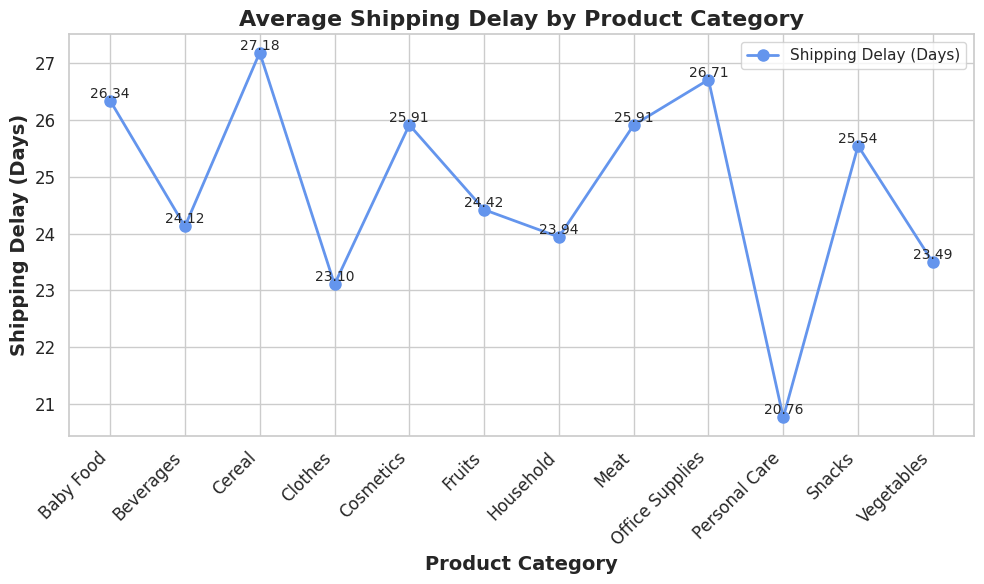

In [ ]:
# Grouping by product and calculating the average shipping delay
shipping_delay_over_product = sales.groupby("category")["shipping_delay_days"].mean()
plt.figure(figsize=(10, 6))

# Building a line plot with markers
plt.plot(shipping_delay_over_product.index, shipping_delay_over_product.values, label="Shipping Delay (Days)",
         marker="o", color="cornflowerblue", linewidth=2, markersize=8)
# Adding data to each line
for i, value in enumerate(shipping_delay_over_product.values):
    plt.text(shipping_delay_over_product.index[i], value, f'{value:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Product Category", fontsize=14, fontweight='bold',)
plt.ylabel("Shipping Delay (Days)", fontsize=14, fontweight='bold' )
plt.title("Average Shipping Delay by Product Category", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Conclusion**

**Personal Care** was shipped faster than other products -  20.76 days. Slowest **Cereal** - 27.18 days

 ##### **By country**

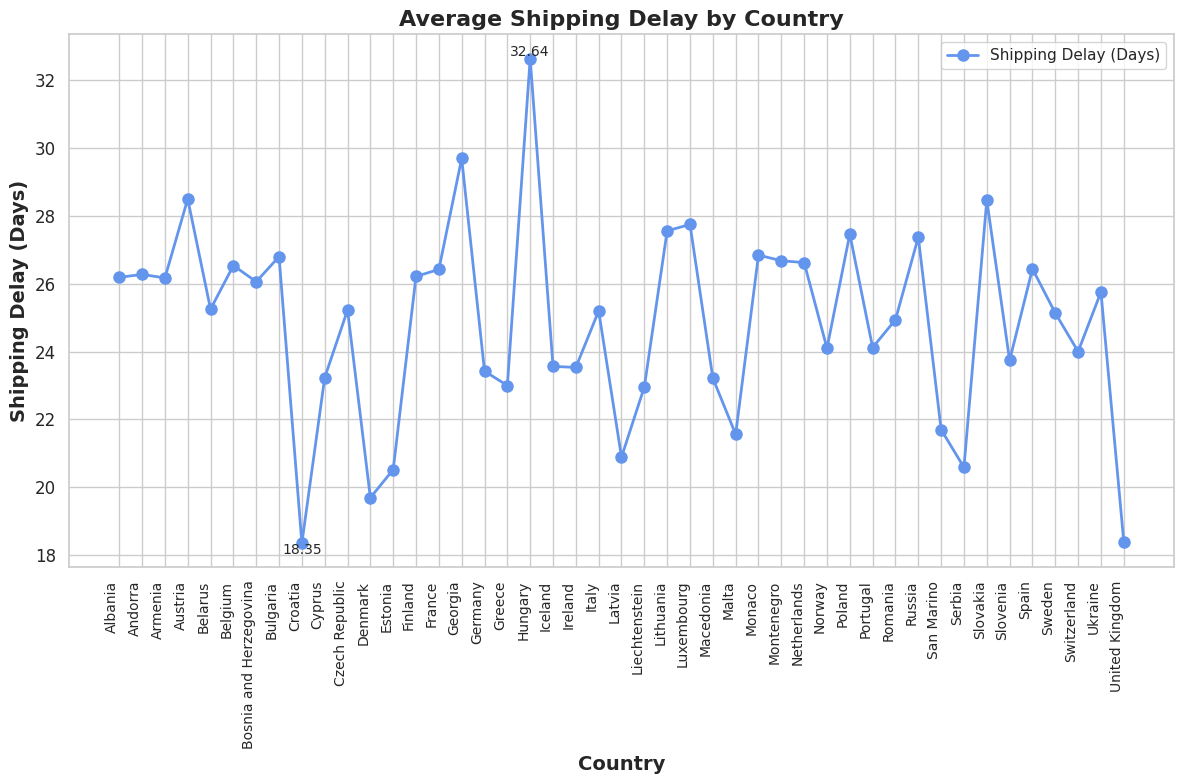

In [ ]:
# Grouping by country and calculating the average shipping delay
shipping_delay_over_country = sales.groupby("country")["shipping_delay_days"].mean()

# Finding the maximum and minimum values
max_delay = shipping_delay_over_country.max()
min_delay = shipping_delay_over_country.min()

# Creating the plot
plt.figure(figsize=(12, 8))
plt.plot(shipping_delay_over_country.index, shipping_delay_over_country.values, label="Shipping Delay (Days)",
         marker="o", color="cornflowerblue", linewidth=2, markersize=8)

# Adding values for the maximum and minimum shipping delays
max_country = shipping_delay_over_country.idxmax()
min_country = shipping_delay_over_country.idxmin()

# Adding the maximum and minimum delay values
plt.text(max_country, max_delay, f'{max_delay:.2f}', ha='center', va='bottom', fontsize=10)
plt.text(min_country, min_delay, f'{min_delay:.2f}', ha='center', va='top', fontsize=10)

plt.xlabel("Country", fontsize=14, fontweight='bold')
plt.ylabel("Shipping Delay (Days)", fontsize=14, fontweight='bold')
plt.title("Average Shipping Delay by Country", fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=10, ha='right')
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Conclusion**

**Croatia** has the fastest shipping, with an average delay of 18.35 days, while **Hungary** has the longest, at 32.64 days.

##### **By region**

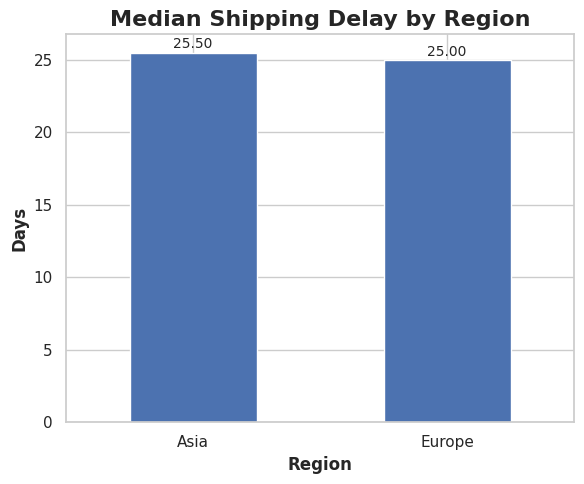

In [ ]:
# Building a bar chart for the median shipping delay by region
plt.figure(figsize=(6, 5))
bars = sales.groupby("region")["shipping_delay_days"].median().plot(kind="bar")

plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.title("Median Shipping Delay by Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12, fontweight='bold')
plt.ylabel("Days", fontsize=12, fontweight='bold')

# Adding values to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.1,
             f"{bar.get_height():.2f}",
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.show()


**Conclusion**

Shipping delays in **Asia** and **Europe** are almost identical, with averages of 25.5 and 25 days, respectively.

 #### **Analysis of profit**

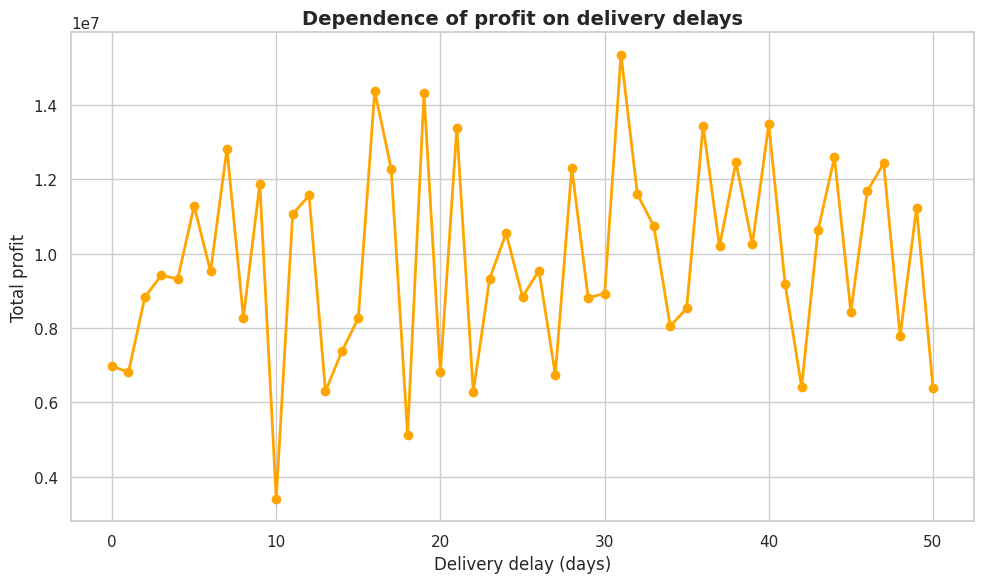

In [ ]:
# Grouping by shipping delay (in days)
profit_by_delay = sales.groupby("shipping_delay_days")["profit"].sum().sort_index()

# Building a line chart
plt.figure(figsize=(10, 6))
profit_by_delay.plot(kind="line", color="orange", marker="o", linewidth=2)

plt.title("Dependence of profit on delivery delays", fontsize=14, fontweight='bold')
plt.xlabel("Delivery delay (days)", fontsize=12)
plt.ylabel("Total profit", fontsize=12)
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

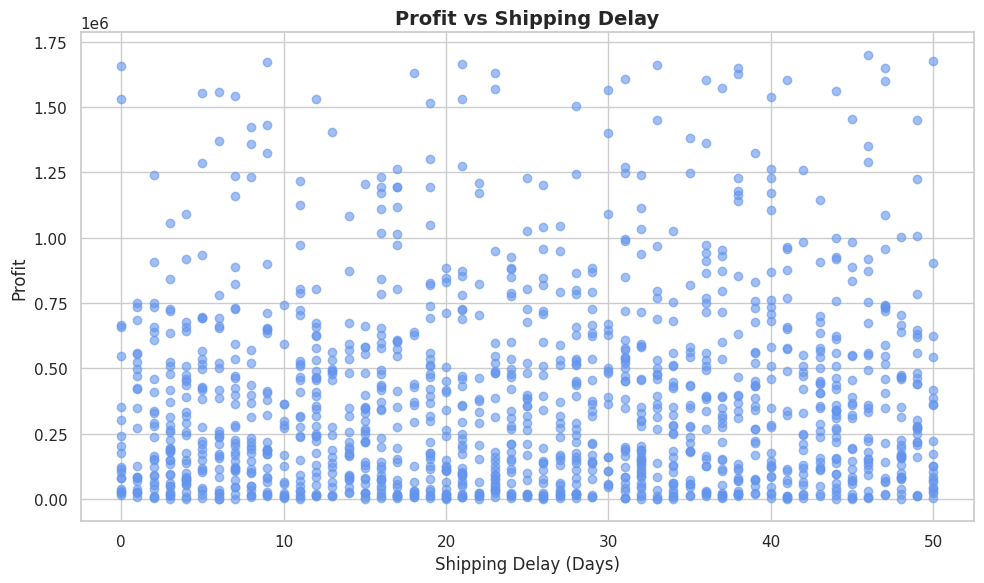

In [ ]:
# Building a scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(sales["shipping_delay_days"], sales["profit"], color="cornflowerblue", alpha=0.6)
plt.title("Profit vs Shipping Delay", fontsize=14, fontweight="bold")
plt.xlabel("Shipping Delay (Days)", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


**Conclusion**

The profit generally remains steady, except for a significant drop at a 10-day delivery delay. This may be linked to **Personal** **Care** , which are delivered quickly but generate lower profit.

 #### **Dynamic of sales**
 #### By category


<Figure size 1200x600 with 0 Axes>

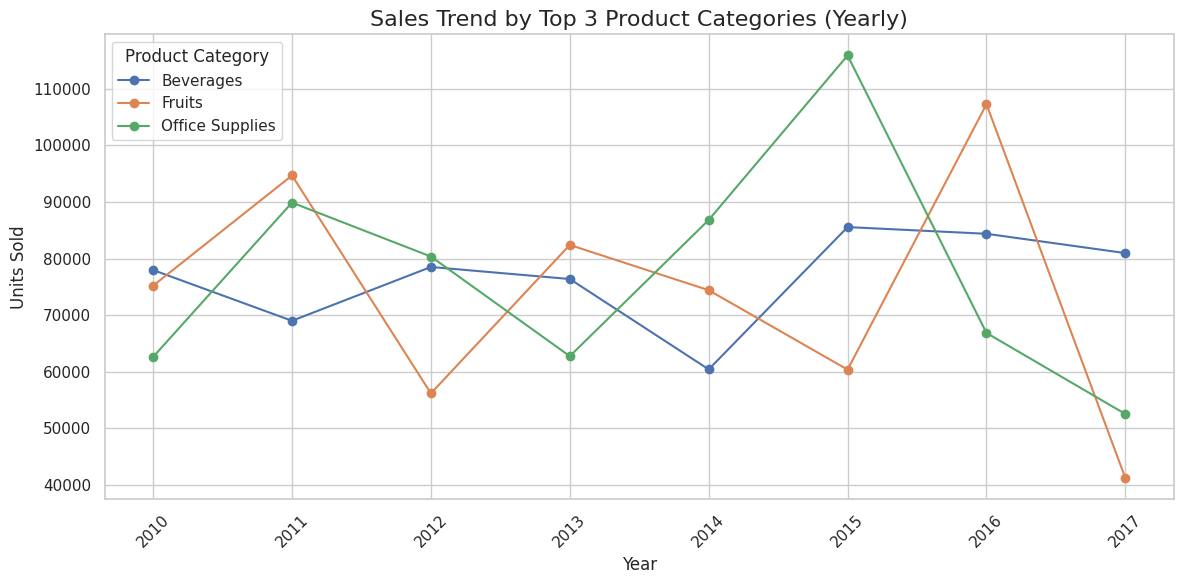

In [ ]:
# Calculate the total sales for each product category
sales_by_category = sales.groupby('category')['units_sold'].sum()

# Get the top 3 categories
top_3_categories = sales_by_category.nlargest(3).index

# Filter data for only the top 3 categories
sales_top_3_categories = sales[sales['category'].isin(top_3_categories)]

# Create a copy of the DataFrame to avoid warnings
sales_top_3_categories = sales_top_3_categories.copy()

# Add the year
sales_top_3_categories['year'] = sales_top_3_categories['order_date'].dt.year

# Group by year and product category
sales_by_category_year = sales_top_3_categories.groupby([sales_top_3_categories['year'], 'category'])['units_sold'].sum().unstack()

# Build the chart
plt.figure(figsize=(12, 6))
sales_by_category_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales Trend by Top 3 Product Categories (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Product Category')
plt.show()



**Office Supplies** experienced the most significant fluctuation in sales, peaking in 2015 and declining sharply by 2017. **Beverages** had a steady trend with a slight dip in 2016. Fruits saw a decrease in sales after 2013, with a notable drop in 2017.

<Figure size 1200x600 with 0 Axes>

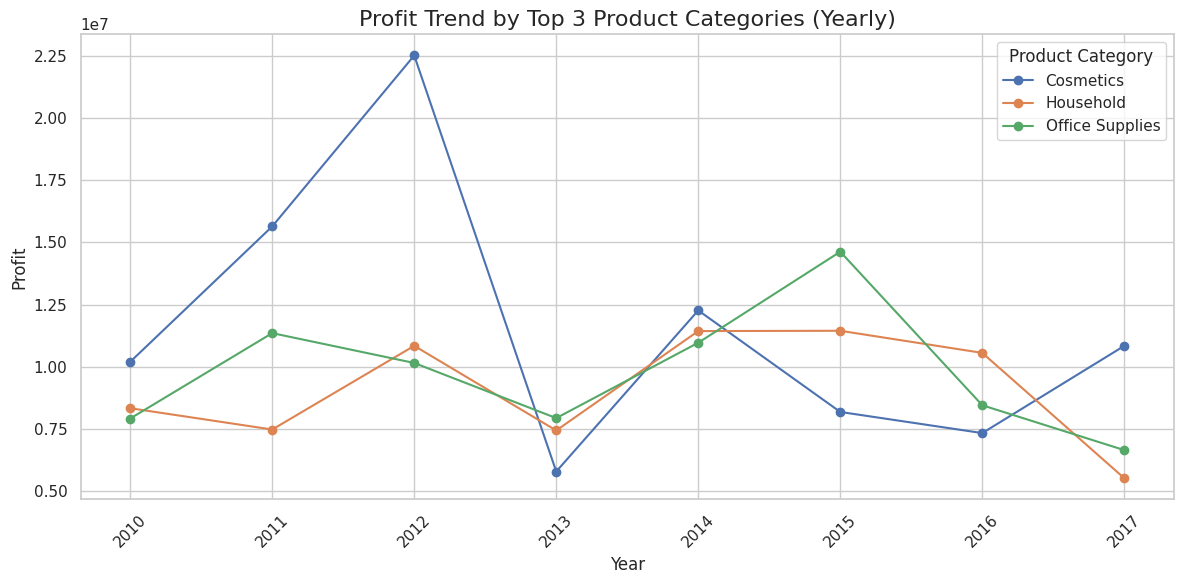

In [ ]:
# Calculate the total profit for each product category
profit_by_category = sales.groupby('category')['profit'].sum()

# Get the top 3 categories by profit
top_3_profit_categories = profit_by_category.nlargest(3).index

# Filter data for only the top 3 profit categories
sales_top_3_profit_categories = sales[sales['category'].isin(top_3_profit_categories)]

# Create a copy of the DataFrame to avoid warnings
sales_top_3_profit_categories = sales_top_3_profit_categories.copy()

# Add the year
sales_top_3_profit_categories['year'] = sales_top_3_profit_categories['order_date'].dt.year

# Group by year and product category
profit_by_category_year = sales_top_3_profit_categories.groupby([sales_top_3_profit_categories['year'], 'category'])['profit'].sum().unstack()

# Build the chart
plt.figure(figsize=(12, 6))
profit_by_category_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Profit Trend by Top 3 Product Categories (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Product Category')
plt.show()


All trends follow a seasonal pattern.
The **Cosmetics**  experienced its peak profits at the end of 2012, exceeding 3 million dollars, and again at the start of 2014, reaching around 2.25 million.
The **office supplies** category saw its highest profit in mid-2014, nearing 2 million dollars.
Meanwhile, the profit trend for **household products** appears more stable, with no notable high points.

<Figure size 1200x600 with 0 Axes>

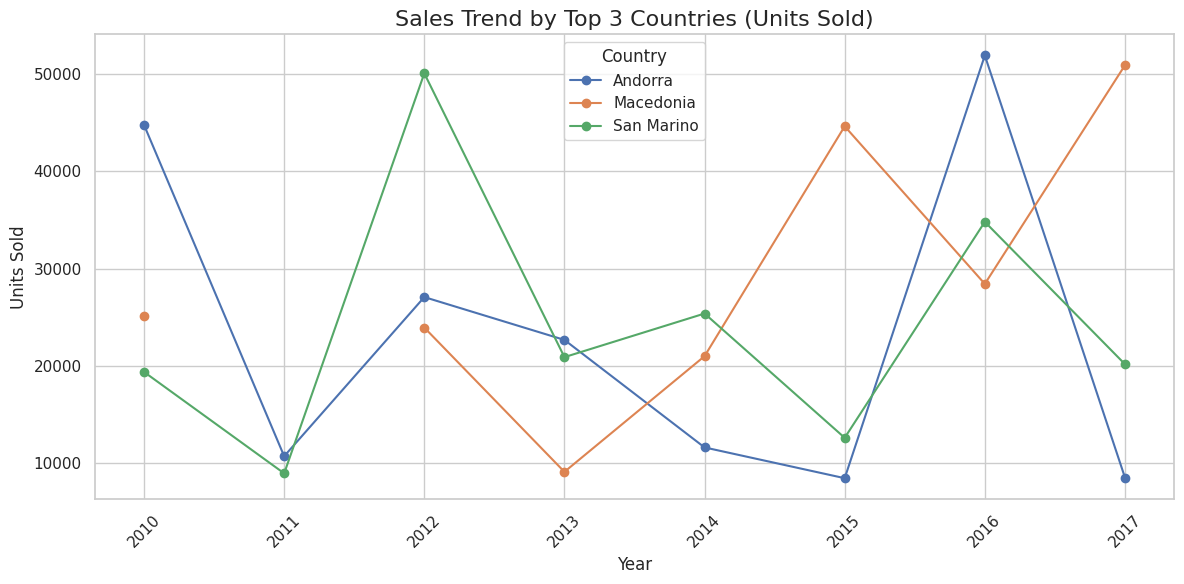

In [ ]:
# Calculate the total units sold for each country
units_sold_by_country = sales.groupby('country')['units_sold'].sum()

# Get the top 3 countries by units sold
top_3_units_sold_countries = units_sold_by_country.nlargest(3).index

# Filter data for only the top 3 countries
sales_top_3_units_sold_countries = sales[sales['country'].isin(top_3_units_sold_countries)]

# Create a copy of the DataFrame to avoid warnings
sales_top_3_units_sold_countries = sales_top_3_units_sold_countries.copy()

# Add the year
sales_top_3_units_sold_countries['year'] = sales_top_3_units_sold_countries['order_date'].dt.year

# Group by year and country, calculating the total units sold
units_sold_by_country_year = sales_top_3_units_sold_countries.groupby([sales_top_3_units_sold_countries['year'], 'country'])['units_sold'].sum().unstack()

# Plot the chart for units sold
plt.figure(figsize=(12, 6))
units_sold_by_country_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales Trend by Top 3 Countries (Units Sold)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

<Figure size 1200x600 with 0 Axes>

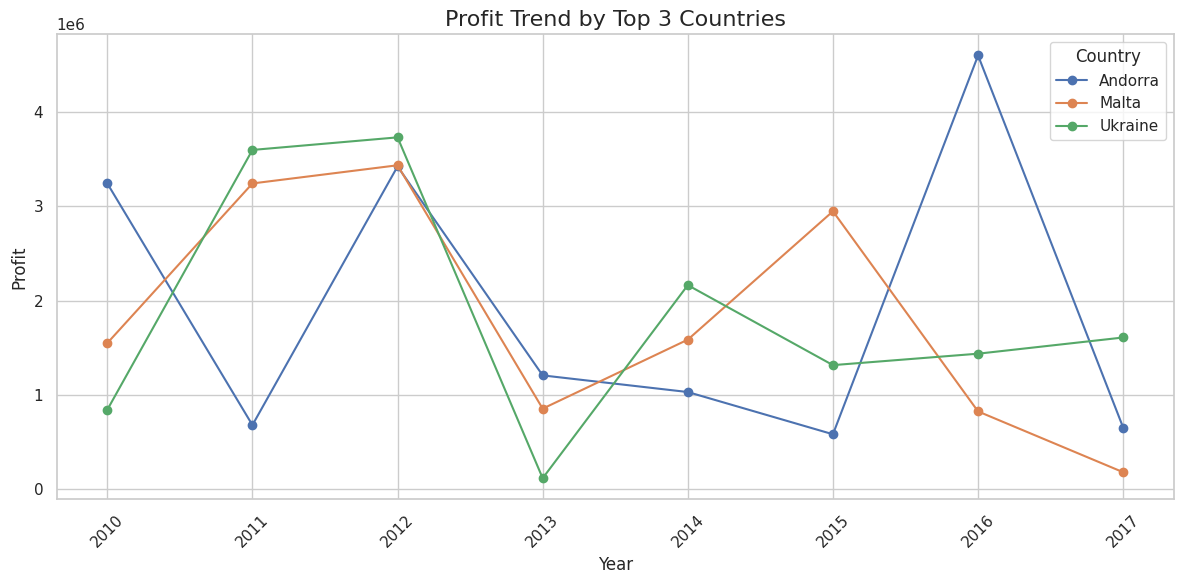

In [ ]:
# Calculate the total profit for each country
profit_by_country = sales.groupby('country')['profit'].sum()
top_3_profit_countries = profit_by_country.nlargest(3).index
sales_top_3_profit_countries = sales[sales['country'].isin(top_3_profit_countries)]
sales_top_3_profit_countries = sales_top_3_profit_countries.copy()
sales_top_3_profit_countries['year'] = sales_top_3_profit_countries['order_date'].dt.year

# Group by year and country, calculating the profit
profit_by_country_year = sales_top_3_profit_countries.groupby([sales_top_3_profit_countries['year'], 'country'])['profit'].sum().unstack()


plt.figure(figsize=(12, 6))
profit_by_country_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Profit Trend by Top 3 Countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

The profit trends for the top three most profitable countries (**Andorra, Ukraine, Malta**) indicate that 2012 was the year with the highest earnings. All three countries generated profits exceeding 1.5 million dollars.

<Figure size 1200x600 with 0 Axes>

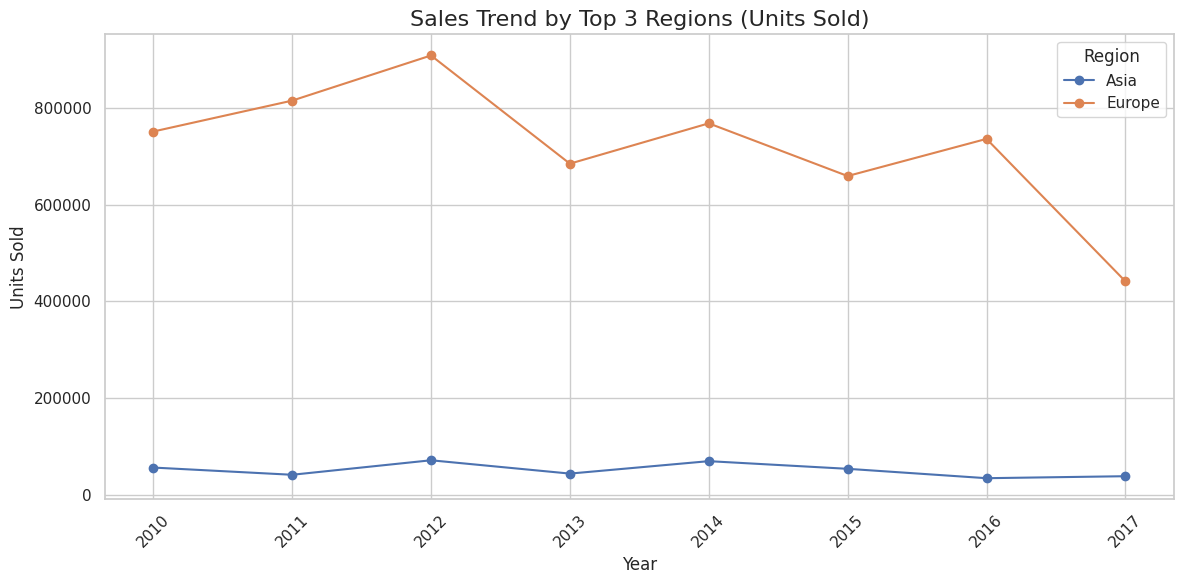

In [ ]:
# Calculate the total units sold for each region
units_sold_by_region = sales.groupby('region')['units_sold'].sum()


top_3_units_sold_regions = units_sold_by_region.nlargest(3).index
sales_top_3_units_sold_regions = sales[sales['region'].isin(top_3_units_sold_regions)]
sales_top_3_units_sold_regions = sales_top_3_units_sold_regions.copy()
sales_top_3_units_sold_regions['year'] = sales_top_3_units_sold_regions['order_date'].dt.year

# Group by year and region, calculating the units sold
units_sold_by_region_year = sales_top_3_units_sold_regions.groupby([sales_top_3_units_sold_regions['year'], 'region'])['units_sold'].sum().unstack()

# Plot the chart for units sold by regions
plt.figure(figsize=(12, 6))
units_sold_by_region_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales Trend by Top 3 Regions (Units Sold)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Region')
plt.show()

<Figure size 1200x600 with 0 Axes>

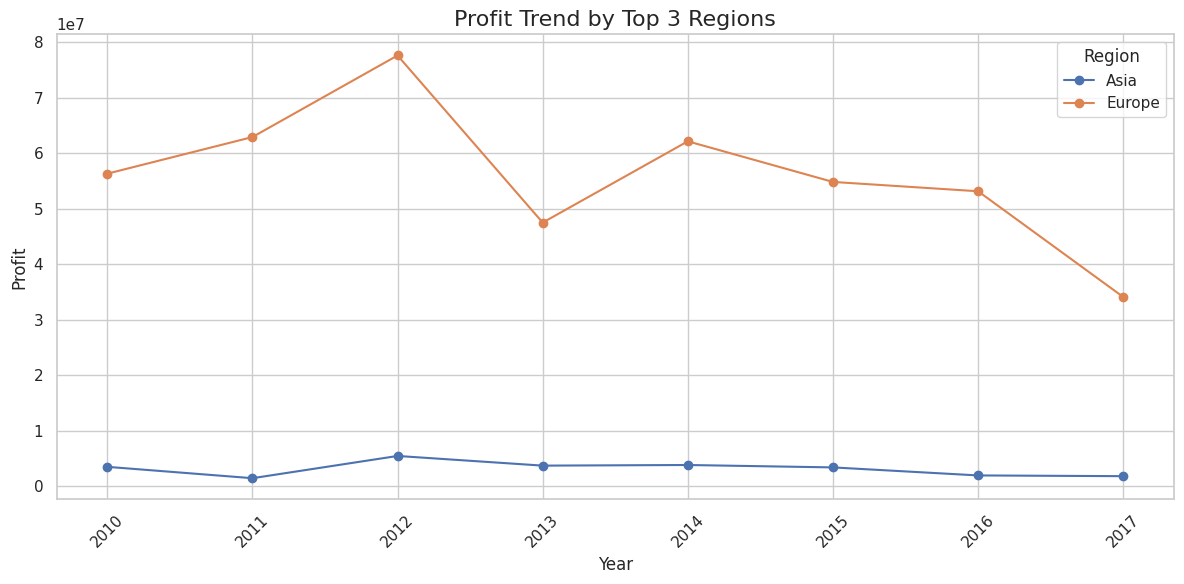

In [ ]:
# Calculate the total profit for each region
profit_by_region = sales.groupby('region')['profit'].sum()


top_3_profit_regions = profit_by_region.nlargest(3).index
sales_top_3_profit_regions = sales[sales['region'].isin(top_3_profit_regions)]
sales_top_3_profit_regions = sales_top_3_profit_regions.copy()
sales_top_3_profit_regions['year'] = sales_top_3_profit_regions['order_date'].dt.year

# Group by year and region, calculating profit
profit_by_region_year = sales_top_3_profit_regions.groupby([sales_top_3_profit_regions['year'], 'region'])['profit'].sum().unstack()

# Plot the chart for profit by regions
plt.figure(figsize=(12, 6))
profit_by_region_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Profit Trend by Top 3 Regions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Region')
plt.show()

The profit trends for **European** countries are significantly higher than those for **Asia**. **Europe** generated its highest total profit at the end of 2012, reaching nearly 3.5 million dollars.

In contrast, **Asia's** peak profit occurred in mid-2012, falling below 1.5 million dollars.

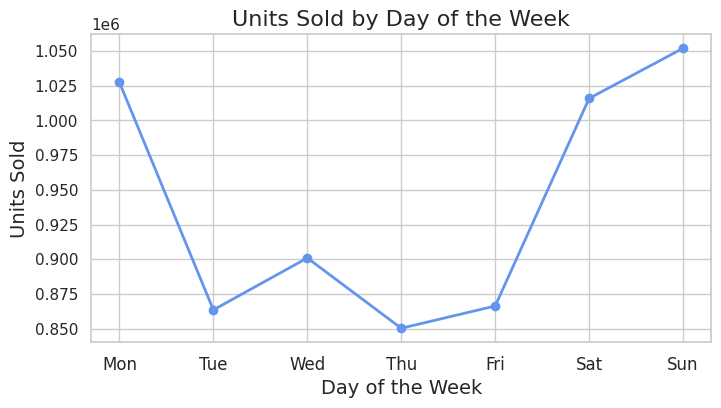

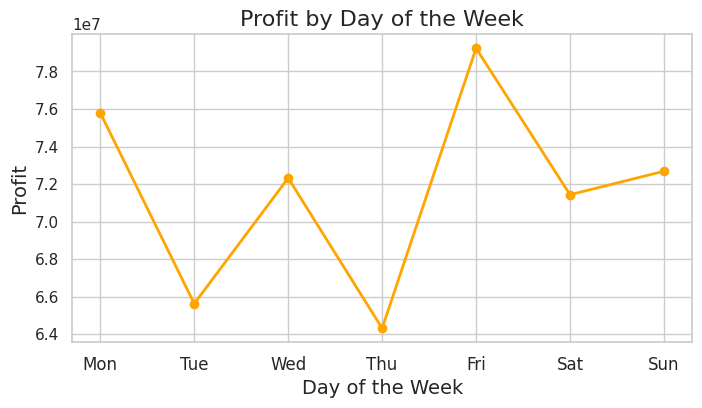

In [ ]:
# Add the day of the week (from 0 to 6, where 0 is Monday)
sales['day_of_week'] = sales['order_date'].dt.dayofweek

# Calculate the total units sold and profit by day of the week
sales_by_day_of_week = sales.groupby('day_of_week').agg(
    units_sold=('units_sold', 'sum'),
    profit=('profit', 'sum')
)

# Plot the graph for units sold
plt.figure(figsize=(8, 4))
plt.plot(sales_by_day_of_week.index, sales_by_day_of_week['units_sold'], label='Units Sold', marker='o', color='cornflowerblue', linewidth=2)
plt.xticks(sales_by_day_of_week.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=12)
plt.title('Units Sold by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.grid(True)
plt.show()

# Plot the graph for profit
plt.figure(figsize=(8, 4))
plt.plot(sales_by_day_of_week.index, sales_by_day_of_week['profit'], label='Profit', marker='o', color='orange', linewidth=2)
plt.xticks(sales_by_day_of_week.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=12)
plt.title('Profit by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()



The highest quantity of products was sold on **Sundays**, indicating that customers tend to make more purchases at the beginning of the week. However, when looking at profit, **Fridays** stand out as the day with the highest earnings. This suggests that while Sunday sees more sales in terms of volume, Friday generates the most profit, likely due to factors such as higher-value purchases or larger transactions on that day.

#**Conclusions**
The analysis conducted in the notebook examines the sales and profit patterns of a business that operates in multiple countries and regions. The main findings include:

**Profitability**: Over the analyzed period, the business generated a total profit of $501,829,110.24, with sales across 45 countries. The highest profits came from the following product categories: Cosmetics, Office Supplies, and Household Goods.

**Sales Channels**: Both online and offline sales channels contribute almost equally to the total sales figures.

**Regional Insights**:
Europe stands out as a far more profitable region compared to Asia. The largest overall profit for Europe was recorded at the end of 2012, approaching 3.5 million, while Asia  peak profit occurred in mid-2012, falling under 1.5 million.
The countries leading in profit generation are Andorra, Ukraine, and Malta, each contributing almost $15 million.

**Delivery Time**: Delivery time does not have a significant impact on overall profit. While some product categories and countries experience faster delivery times, this does not necessarily correlate with higher profits. For example, personal hygiene products were delivered more quickly than other items, yet these products were less profitable. Similarly Croatia had faster delivery times, but  this country do not ranked among the top 10 most profitable. When looking at delivery times by region, products were shipped at similar speeds to both regions.

**Day of the Week**: Sales tend to be higher in the start and end of the week.



#**Recommendations**



**Expand focus on European markets**: Given Europe's notably higher profitability, particularly in countries like Andorra, Ukraine, and Malta, consider increasing business presence and marketing activities in these regions for better market penetration and profit growth.

**Maximize profitability in key product categories**: Direct more resources and marketing efforts toward Cosmetics, Office Supplies, and Household Goods to enhance profits. Explore opportunities for promotions or product bundles to further drive sales in these high-performing categories.

**Reevaluate pricing and cost management**: Although delivery time doesn't significantly affect profits, it's important to continuously assess the pricing and cost structure for each product category. Look for ways to optimize costs while maintaining product quality and customer satisfaction to ensure higher profitability.

**Balance online and offline sales channels**: Continue fostering a balanced strategy between online and offline channels to provide a consistent and smooth customer experience. Invest in initiatives to boost customer engagement and loyalty across both sales platforms.